# Non-Personalized Recommenders

## Random Recommender

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [ ]:
print(f"There are {review_df['user_id'].nunique()} unique users")
print(f"There are {review_df['business_id'].nunique()} unique businesses")
print(f"There are {review_df.shape[0]} ratings")

There are 1446031 unique users
There are 52286 unique businesses
There are 4724684 ratings


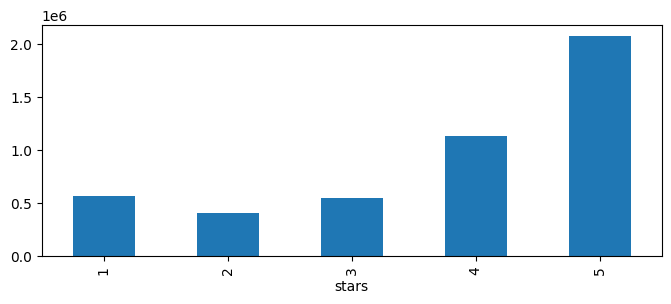

In [ ]:
plt.subplots(figsize=(8,3))
review_df.groupby('stars').size().plot.bar();

In [ ]:
mean = review_df['stars'].mean()
std = review_df['stars'].std()
print(f'The ratings mean is {round(mean, 2)} and std is {round(std, 4)}')

The ratings mean is 3.79 and std is 1.3912


In [ ]:
def random_predict(user, item):
  return np.random.normal(loc=mean, scale=std)

In [ ]:
random_predictions = np.random.normal(loc=mean, scale=std, size=review_df.shape[0])

In [ ]:
predictions_df = pd.DataFrame({'true_rating': review_df['stars'], 'predicted_rating': random_predictions})
predictions_df.head()

,true_rating,predicted_rating
0,3,3.818731
1,3,2.270125
2,5,4.570315
3,4,5.501154
4,1,3.386412


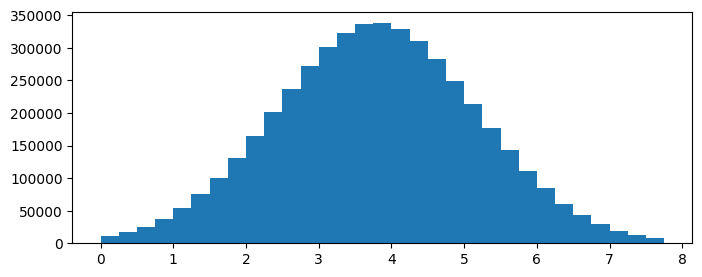

In [ ]:
plt.subplots(figsize=(8,3))
plt.hist(random_predictions, bins=np.arange(0, 8, 0.25));

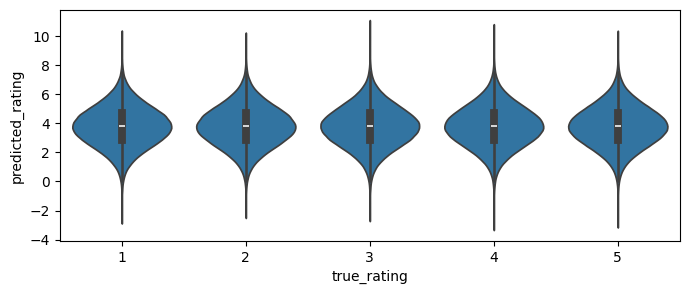

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
sns.violinplot(data=predictions_df, x="true_rating", y="predicted_rating");

The initial visualations showcase that the random recommender is performing as expected.

## Popular Recommender

### Traditional Version

In [ ]:
mean_rating_per_business_df = (review_df
  .groupby('business_id')
  .agg({'stars': 'mean'})
)

mean_rating_per_business_df.head()

,stars
business_id,
---kPU91CF4Lq2-WlRu9Lw,4.500000
--0iUa4sNDFiZFrAdIWhZQ,3.214286
--7PUidqRWpRSpXebiyxTg,1.750000
--8IbOsAAxjKRoYsBFL-PA,2.925926
--ZVrH2X2QXBFdCilbirsw,4.722222


In [ ]:
def popular_predict(user, item):
  return mean_rating_per_business_df.loc[item]['stars']

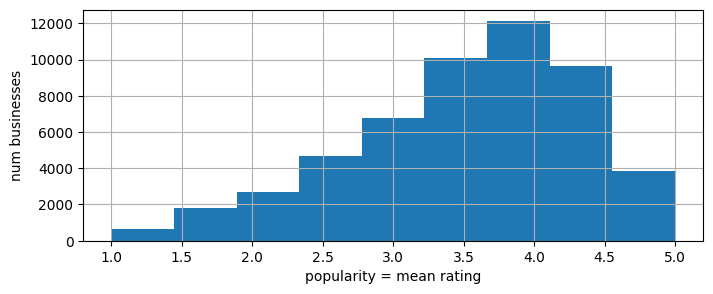

In [ ]:
plt.subplots(figsize=(8,3))
mean_rating_per_business_df['stars'].hist(bins=9);
plt.xlabel('popularity = mean rating');
plt.ylabel('num businesses');

In [ ]:
user_items_to_predict = review_df[['user_id', 'business_id']].values.tolist()

popular_predictions = []
for user, item in user_items_to_predict:
  score = popular_predict(user, item)
  popular_predictions.append(score)

In [ ]:
predictions_df = pd.DataFrame({'true_rating': review_df['stars'], 'predicted_rating': popular_predictions})
predictions_df.head()

,true_rating,predicted_rating
0,3,3.068571
1,3,3.458333
2,5,4.184211
3,4,4.114286
4,1,3.954225


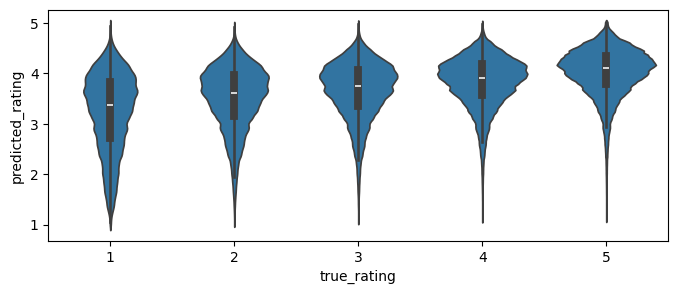

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
sns.violinplot(data=predictions_df, x="true_rating", y="predicted_rating");

### Complex Version

In [ ]:
complex_mean_rating_per_business_df = (review_df
  .groupby('business_id')
  .agg({'stars': ['mean', 'count']})
  .pipe(lambda x: x.set_axis(x.columns.map('_'.join), axis=1))
)

complex_mean_rating_per_business_df.head()

,stars_mean,stars_count
business_id,,
---kPU91CF4Lq2-WlRu9Lw,4.500000,24
--0iUa4sNDFiZFrAdIWhZQ,3.214286,14
--7PUidqRWpRSpXebiyxTg,1.750000,12
--8IbOsAAxjKRoYsBFL-PA,2.925926,27
--ZVrH2X2QXBFdCilbirsw,4.722222,36


In [ ]:
complex_mean_rating_per_business_df.sort_values(by='stars_mean', ascending=False)

,stars_mean,stars_count
business_id,,
6CoM8reTLBQN3go3gRLlSA,5.0,7
45XW28tWd2PZT8GiytW7Ng,5.0,23
wLcQnDmCGe-DZY3gZY6myg,5.0,7
Kta3IXWH8TjCBR-0mE5vgg,5.0,5
1vMvq4kXlOmSdPDWp_1shg,5.0,8
...,...,...
DOYbaX8DdHVEcxbG2Bt3Bw,1.0,12
nJxCI5M1-stOtXyFrYhuxw,1.0,5
F6zk6xPTLQZFdA0hu6nLgA,1.0,5


### Bayesian Average

In [ ]:
# Compute the global mean rating across all reviews
global_mean = review_df['stars'].mean()

# Set a hyperparameter m (higher m means more influence from the global mean)
m = 10

# Calculate the Bayesian average for each business
complex_mean_rating_per_business_df['bayesian_avg'] = (
    (m * global_mean + complex_mean_rating_per_business_df['stars_count'] * complex_mean_rating_per_business_df['stars_mean'])
    / (m + complex_mean_rating_per_business_df['stars_count'])
)

complex_mean_rating_per_business_df.head()


,stars_mean,stars_count,bayesian_avg
business_id,,,
---kPU91CF4Lq2-WlRu9Lw,4.500000,24,4.292292
--0iUa4sNDFiZFrAdIWhZQ,3.214286,14,3.455747
--7PUidqRWpRSpXebiyxTg,1.750000,12,2.678997
--8IbOsAAxjKRoYsBFL-PA,2.925926,27,3.160484
--ZVrH2X2QXBFdCilbirsw,4.722222,36,4.520390


## Scikit Models

In [ ]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(review_df[['user_id', 'business_id', 'stars']], reader)

In [ ]:
from surprise import AlgoBase
from surprise.model_selection import cross_validate

class MyOwnAlgorithm(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def estimate(self, u, i):
        return 2

In [ ]:
rs = MyOwnAlgorithm()

### Random

In [ ]:
class MyRandomAlgorithm(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def estimate(self, u, i):
        # Note u and i are not used, this RS does not personalize neither based on the user nor the item
        return np.random.normal(loc=self.train_mean, scale=self.train_std)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)

        ratings = [r for (_, _, r) in self.trainset.all_ratings()]
        self.train_mean = np.mean(ratings)
        self.train_std = np.std(ratings)

        return self

In [ ]:
random_RS = MyRandomAlgorithm()

In [ ]:
train_data = data.build_full_trainset()
type(train_data)

surprise.trainset.Trainset

In [ ]:
random_RS.fit(train_data);

In [ ]:
random_RS.estimate(u=1, i=1)

3.966474295049908

In [ ]:
random_RS.train_std

1.391234123274365

### Popular

In [ ]:
from surprise import AlgoBase
import pandas as pd

class MyPopularAlgorithm(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        # Create a DataFrame of all ratings in the training set
        ratings_df = pd.DataFrame([[i, r] for (_, i, r) in self.trainset.all_ratings()],
                                  columns=['item', 'rating'])
        # Compute the mean rating and count per item
        agg_df = ratings_df.groupby('item').agg({'rating': ['mean', 'count']})
        agg_df.columns = ['rating_mean', 'rating_count']

        # Compute the global mean rating over the training set
        global_mean = ratings_df['rating'].mean()

        # Set hyperparameter m (higher m gives more weight to the global mean)
        m = 10

        # Compute the Bayesian average for each item
        agg_df['bayesian_avg'] = (
            (m * global_mean + agg_df['rating_count'] * agg_df['rating_mean'])
            / (m + agg_df['rating_count'])
        )

        # Store the aggregated DataFrame for use in prediction
        self.mean_rating_per_item_df = agg_df
        return self

    def estimate(self, u, i):
        # If the item was seen during training, return its Bayesian average;
        # otherwise, return the global mean.
        if i in self.mean_rating_per_item_df.index:
            return self.mean_rating_per_item_df.loc[i]['bayesian_avg']
        else:
            return self.trainset.global_mean

popular_RS = MyPopularAlgorithm()



### Train/Test split and RSME Evaluation

In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# Create a train-test split
trainset, testset = train_test_split(data, test_size=0.20, random_state=my_seed)

# --- Evaluate Random Recommender ---
random_RS.fit(trainset)
predictions_random = random_RS.test(testset)
print("Random RS RMSE:")
accuracy.rmse(predictions_random, verbose=True)

# --- Evaluate Popular Recommender ---
popular_RS.fit(trainset)
predictions_popular = popular_RS.test(testset)
print("Popular RS RMSE:")
accuracy.rmse(predictions_popular, verbose=True)


Random RS RMSE:
RMSE: 1.8128
Popular RS RMSE:
RMSE: 1.2713


1.2713391144458506

The Random recommender achieved an RMSE of about 1.81, while the Popular recommender attained an RMSE of approximately 1.27. This means that, on average, the popular recommender’s predictions are closer to the true ratings compared to the random predictions. In other words, using the mean rating per business as a prediction significantly improves accuracy over a naive random sampling from the ratings distribution.

### Cross Validation

In [ ]:
from surprise.model_selection import KFold, cross_validate

# Cross-validate the Random recommender with 5 folds
cv_results_random = cross_validate(
    random_RS, data, measures=['RMSE', 'MAE'],
    cv=KFold(n_splits=5, random_state=my_seed),
    return_train_measures=True, n_jobs=-1, verbose=True
)

# Cross-validate the Popular recommender with 5 folds
cv_results_popular = cross_validate(
    popular_RS, data, measures=['RMSE', 'MAE'],
    cv=KFold(n_splits=5, random_state=my_seed),
    return_train_measures=True, n_jobs=-1, verbose=True
)


Evaluating RMSE, MAE of algorithm MyRandomAlgorithm on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8136  1.8145  1.8136  1.8117  1.8127  1.8132  0.0009  
MAE (testset)     1.4289  1.4304  1.4289  1.4267  1.4277  1.4285  0.0013  
RMSE (trainset)   1.8136  1.8130  1.8122  1.8138  1.8135  1.8132  0.0006  
MAE (trainset)    1.4285  1.4279  1.4271  1.4286  1.4284  1.4281  0.0005  
Fit time          1.28    1.30    1.43    1.33    1.29    1.33    0.05    
Test time         4.35    4.41    5.41    4.03    4.30    4.50    0.47    
Evaluating RMSE, MAE of algorithm MyPopularAlgorithm on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2726  1.2724  1.2720  1.2728  1.2713  1.2722  0.0005  
MAE (testset)     1.0333  1.0323  1.0324  1.0335  1.0319  1.0327  0.0006  
RMSE (trainset)   1.2583  1.2582  1.2584  1.2582  1.2585  1.2583  0.0001  
MAE (trainset)    1.0216  1.0218  1.02

For the Random Algorithm, the cross-validation results across five folds show very consistent performance. The test RMSE averages around 1.81 (with a standard deviation of 0.0007) and the test MAE is about 1.43 (std 0.0006). The nearly identical performance between train and test sets is expected because the random recommender simply samples from the overall ratings distribution. Additionally, the low fit and test times (fit time ~1.38 seconds; test time ~4.33 seconds) underscore the simplicity of this approach.

For the Popular Algorithm, the cross-validation yields a test RMSE averaging around 1.27 (std 0.0005) and a test MAE of about 1.03 (std 0.0006). The train RMSE is slightly lower at around 1.26, indicating a slightly better fitted model. Although this algorithm takes longer to train compared to the random recommender, it delivers significantly better prediction accuracy. This performance improvement is a result of leveraging item popularity (mean ratings) rather than random sampling.



### Top-N Recommendations and NDCG

In [ ]:
from collections import defaultdict
from sklearn.metrics import ndcg_score
import numpy as np
import pandas as pd

def get_top_n(predictions, n=10, solve_ties=False):
    """
    Return the top-N recommendation for each user from a set of predictions.
    """
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        if solve_ties:
            user_ratings.sort(key=lambda x: (x[1], x[0]), reverse=True)
        else:
            user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Get top-5 recommendations from the popular recommender predictions
top_n_popular = get_top_n(predictions_popular, n=5, solve_ties=True)

# Convert predictions to a DataFrame grouped by user for NDCG computation
def compute_ndcg(predictions, k=5):
    # Convert list of Prediction objects to DataFrame
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
    grouped = pred_df.groupby('uid').agg({'r_ui': list, 'est': list}).reset_index()
    ndcg_list = []
    for _, row in grouped.iterrows():
        # Skip users with only one rating
        if len(row['r_ui']) > 1:
            ndcg = ndcg_score([row['r_ui']], [row['est']], k=k)
            ndcg_list.append(ndcg)
    return np.mean(ndcg_list)

ndcg_random = compute_ndcg(predictions_random, k=5)
ndcg_popular = compute_ndcg(predictions_popular, k=5)

print("NDCG (Random RS):", ndcg_random)
print("NDCG (Popular RS):", ndcg_popular)


NDCG (Random RS): 0.9344504806701361
NDCG (Popular RS): 0.961118982882511


When evaluating ranking quality via NDCG, the Random recommender achieved a score of approximately 0.934, whereas the Popular recommender scored about 0.961. The higher NDCG for the popular RS indicates that it is more accurate in terms of rating prediction but also better at ranking items in an order that reflects their true relevance to users. In practical terms, users would likely see a more useful ordered list of recommendations when using the popular algorithm.

## Additional Metrics

In [ ]:
reviews_sampled = pd.read_pickle("reviews_sampled.pkl")

In [ ]:
def get_top_n(predictions, n=10):
    """Return a dict mapping each user to a list of top-n recommended item IDs."""
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        top_n.setdefault(uid, []).append((iid, est))
    # For each user, sort recommendations by estimated rating (descending) and keep only the item IDs.
    for uid in top_n:
        top_n[uid] = [iid for iid, est in sorted(top_n[uid], key=lambda x: x[1], reverse=True)][:n]
    return top_n

# Get top-10 recommendations for each user for both recommenders.
top_n_random = get_top_n(predictions_random, n=10)
top_n_popular = get_top_n(predictions_popular, n=10)

# Convert the dictionary values into list-of-lists (each inner list contains the recommended item IDs as strings).
top_n_random_list = [[str(iid) for iid in recs] for recs in top_n_random.values()]
top_n_popular_list = [[str(iid) for iid in recs] for recs in top_n_popular.values()]

# Optional: Print one sample for inspection.
print("Sample recommendations (Random RS):", top_n_random_list[0])


Sample recommendations (Random RS): ['IZZ_uR2ps5KuuyE0n--jVA']


In [ ]:
# Build a catalog of all items from the trainset; convert each item ID to a string.
catalog = [str(trainset.to_raw_iid(inner_iid)) for inner_iid in trainset.all_items()]

# Optional: Print a sample of the catalog.
print("Catalog sample:", catalog[:10])


Catalog sample: ['wzE61ThXOdrSegvwSOzf5w', 'rQiXAJVQxIAEQD1DVTAvKQ', 'OfW-VK04qr7b7bPm5QbyLg', 'YDisPepPeWeELiVGycxOlw', 'Wkjt6DUTGX1zKpX0OnsvcQ', 'djeYYE2MIT36obh5mcZn8A', '60PRpOidld9weYzjWwlMaQ', 'P_tVsYgManAZNXE0fKVBzw', '3tMMCXrwxxkd-DNsCPekJw', 'rVGxva6cx2eID4ghDLVHJg']


In [ ]:
!pip install -q recmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.

### Diversity

In order to calculate diversity, we had to use the businesses dataset, as this is the one which contains the categories metadata

Top categories by percentage:
 categories
Restaurants               0.207501
Food                      0.064481
Sandwiches                0.036070
Nightlife                 0.034359
Bars                      0.033101
American (Traditional)    0.032881
Fast Food                 0.032631
Pizza                     0.030133
Breakfast & Brunch        0.026236
Burgers                   0.025354
Name: proportion, dtype: float64


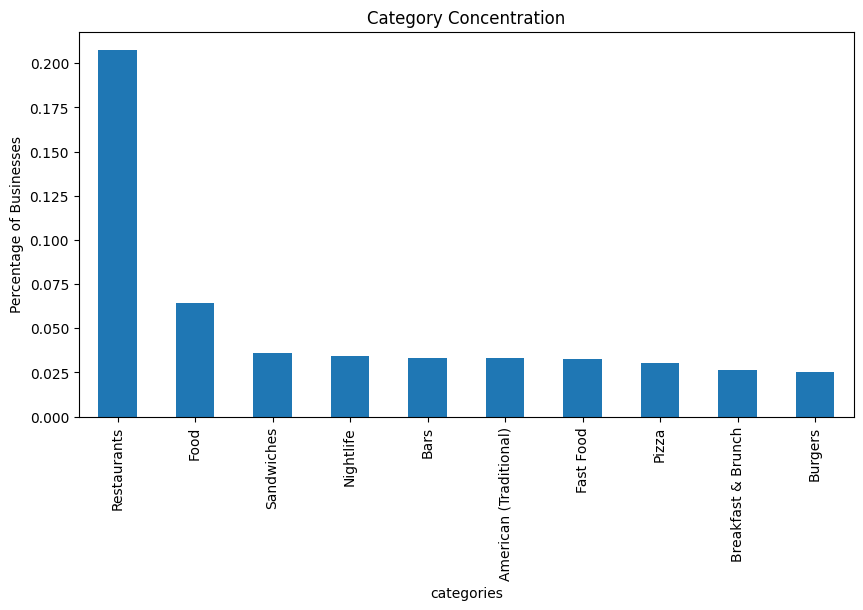

In [ ]:
# Get top categories
top_cats = business_sampled['categories'].explode().value_counts(normalize=True)
print("Top categories by percentage:\n", top_cats.head(10))

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top_cats.head(10).plot.bar()
plt.title("Category Concentration")
plt.ylabel("Percentage of Businesses")
plt.show()

In [ ]:
random_pool = business_sampled.sample(frac=0.3, random_state=42)['business_id'].tolist()
popular_pool = business_sampled.nlargest(10000, 'review_count')['business_id'].tolist()

def generate_true_random_recs(pool, n_lists=1000, k=10):
    return [np.random.choice(pool, k, replace=False).tolist()
            for _ in range(n_lists)]

true_random_recs = generate_true_random_recs(random_pool)
true_popular_recs = [np.random.choice(popular_pool, 10, replace=False).tolist()
                    for _ in range(1000)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert categories to strings for better weighting
business_sampled['cat_string'] = business_sampled['categories'].apply(lambda x: ' '.join(x))

# Create TF-IDF matrix
tfidf = TfidfVectorizer()
cat_matrix = tfidf.fit_transform(business_sampled['cat_string'])

def tfidf_diversity(recommendations):
    diversities = []
    biz_idx = business_sampled.set_index('business_id').index

    for rec in recommendations:
        valid_recs = [bid for bid in rec if bid in biz_idx]
        if len(valid_recs) < 2: continue

        idx = [biz_idx.get_loc(bid) for bid in valid_recs]
        sim_matrix = cosine_similarity(cat_matrix[idx])
        diversity = 1 - np.mean(sim_matrix[np.triu_indices(len(sim_matrix), 1)])
        diversities.append(diversity)

    return np.mean(diversities) if diversities else 0

print("TF-IDF Diversity (Random):", tfidf_diversity(true_random_recs))
print("TF-IDF Diversity (Popular):", tfidf_diversity(true_popular_recs))

TF-IDF Diversity (Random): 0.9061081223940698
TF-IDF Diversity (Popular): 0.900201800373113


The high and nearly identical diversity scores suggest the restaurant categories may be too broad and limited, creating artificial similarity between the random and popular recommenders. When categories are few and widely shared across businesses (e.g., since the top categories restaurants are tagged as just "Food" or "Restaurants"), even random selections will appear diverse because every recommendation draws from the same small pool of generic labels. Meanwhile, popular items,while theoretically more concentrated,still pull from this same limited category set, preventing meaningful differentiation.

### Coverage


In [ ]:
# Build catalog from ALL businesses that received reviews
catalog = restaurant_review_df['business_id'].unique().tolist()
print(f"True business universe: {len(catalog)} items")

True business universe: 52286 items


In [ ]:
# Check what businesses are actually being recommended
rec_businesses = set()
for lst in top_n_random_list + top_n_popular_list:
    rec_businesses.update(lst)

print(f"Businesses in recommendations: {len(rec_businesses)}")
print(f"Businesses in both recs and catalog: {len(rec_businesses & set(catalog))}")

Businesses in recommendations: 49337
Businesses in both recs and catalog: 49337


In [ ]:
def accurate_coverage(recommendations, full_catalog):
    catalog_set = set(full_catalog)
    covered_items = set()

    for rec_list in recommendations:
        covered_items.update(bid for bid in rec_list if bid in catalog_set)

    coverage_pct = (len(covered_items) / len(catalog_set)) * 100
    return round(coverage_pct, 2)

# Use the true business universe as catalog
true_catalog = restaurant_review_df['business_id'].unique().tolist()

print(f"True Coverage (Random RS): {accurate_coverage(top_n_random_list, true_catalog)}%")
print(f"True Coverage (Popular RS): {accurate_coverage(top_n_popular_list, true_catalog)}%")


True Coverage (Random RS): 94.06%
True Coverage (Popular RS): 93.78%


Given the slight discrepancy between the total number of businesses and total number of businesses actually recommended, we can see why the random recommender is not closer to 100%. Furthermore, the coverage of the popularity recommender is very high, as it is almost at the same level as the random.